# 평균에 대하여

## 1.환경준비

* 라이브러리 불러오기

In [4]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

## 2.분산과 표준편차

* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [7]:
a = np.array([180,173,165,166,171])

print(f'평균 : {a.mean()}')
print(f'분산 : {a.var()}')
print(f'표준편차 : {a.std()}')

평균 : 171.0
분산 : 29.2
표준편차 : 5.403702434442518


## 3.평균비교

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

### (1) 표준오차(SE, standard error)
* 표준오차는 표준편차와 다른 개념입니다. (표준 편차와 비교하는 개념이 아닙니다!)
* 우선 **표본(의) 평균**을 이해해야 합니다.
* 표본을 뽑아내는(표집, sampling) 목적은, 모집단을 추정하기 위함 입니다.
    * 표본평균을 계산한다는 의미는, 표본의 평균으로 모집단의 평균을 **추정**하기 위함 입니다.(**추정치**)
    * 표본의 평균을 계산하면, 표본 자체의 평균이라는 의미가 아니라, 모평균을 표본으로 추정한 평균치 입니다.
    * 그래서 표본평균 하면 항상 모평균을 의식해야 합니다.
* 그런데 표본평균은 모평균과 완전히 일치할 수는 없습니다.
* 이 오차를 **표준오차** 라고 합니다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n
* 표준 오차로 부터 신뢰구간을 계산하게 됩니다.

* 몇가지 기호에 대해서  

<img src='https://github.com/DA4BAM/image/blob/main/%EA%B8%B0%ED%98%B8.png?raw=true' width=500/>

### (2) 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [17]:
# 임의의 모집단을 하나 만듭시다.
pop = [round(rd.normalvariate(172, 7),1) for i in range(800000)]

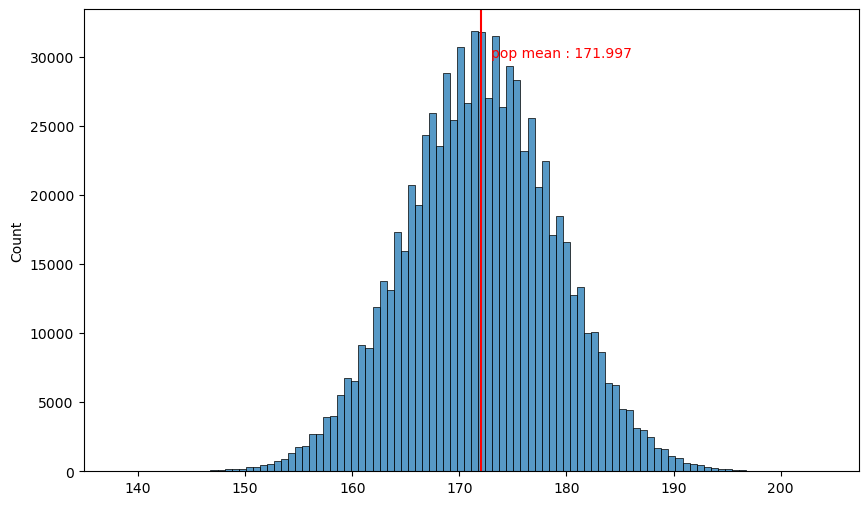

In [19]:
# 우리는 모집단을 알 수 없지만.
# 전지적 분석가 시점에서 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop, bins = 100)
plt.axvline(np.mean(pop), color = 'r')
plt.text(np.mean(pop)+1, 30000, f'pop mean : {np.mean(pop).round(3)}', color = 'r')
plt.show()

* 표본 조사를 합니다.
    * 50명을 임의로 샘플링 해서
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [21]:
# 표본조사를 합니다. 50
s1 = rd.sample(pop, 50)
s1 = pd.Series(s1)
round(s1.mean(),3)

171.416

In [22]:
x_mean = []
for i in range(100):
    s1 = rd.sample(pop, 50)
    s1 = pd.Series(s1)
    x_mean.append(round(s1.mean(),3))

x_mean

[172.332,
 173.37,
 172.786,
 172.148,
 174.442,
 172.514,
 171.184,
 170.514,
 171.82,
 171.136,
 172.22,
 170.61,
 173.058,
 170.404,
 172.008,
 172.478,
 170.406,
 172.434,
 170.796,
 170.928,
 172.506,
 172.204,
 170.578,
 173.458,
 171.368,
 171.106,
 171.35,
 173.746,
 172.586,
 172.71,
 172.07,
 172.712,
 170.972,
 172.606,
 172.132,
 170.07,
 173.11,
 172.782,
 173.482,
 170.752,
 171.454,
 168.692,
 172.482,
 171.074,
 171.398,
 170.728,
 171.104,
 172.018,
 171.43,
 170.884,
 172.848,
 173.774,
 172.234,
 171.362,
 173.81,
 171.328,
 170.786,
 172.83,
 173.414,
 173.57,
 171.942,
 172.088,
 171.558,
 171.288,
 176.172,
 170.956,
 171.874,
 171.272,
 173.786,
 171.854,
 171.09,
 171.488,
 171.43,
 172.356,
 171.242,
 171.842,
 172.168,
 171.03,
 171.04,
 172.118,
 173.37,
 173.212,
 171.848,
 171.772,
 172.328,
 172.852,
 170.78,
 170.866,
 172.376,
 172.426,
 171.522,
 172.296,
 173.076,
 171.632,
 171.434,
 172.948,
 171.286,
 171.004,
 172.93,
 170.574]

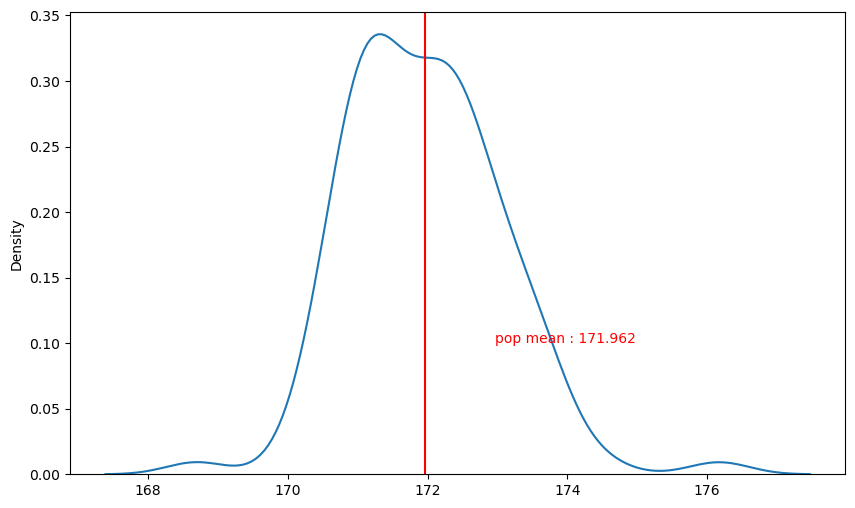

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(x_mean)
plt.axvline(np.mean(x_mean), color = 'r')
plt.text(np.mean(x_mean)+1, 0.1, f'pop mean : {round(np.mean(x_mean),3)}', color = 'r')
plt.show()

In [25]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(168.52296370544062, 172.62503629455946)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [27]:
# 모평균은?
np.mean(pop)

171.99690224999998

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.

In [32]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop,100)

samples = pd.DataFrame(samples)
samples.shape

(10000, 2)

C:\Users\User\AppData\Local\Temp\ipykernel_27860\2126722236.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x = 'id', y = 'value', data = samples, join = False)


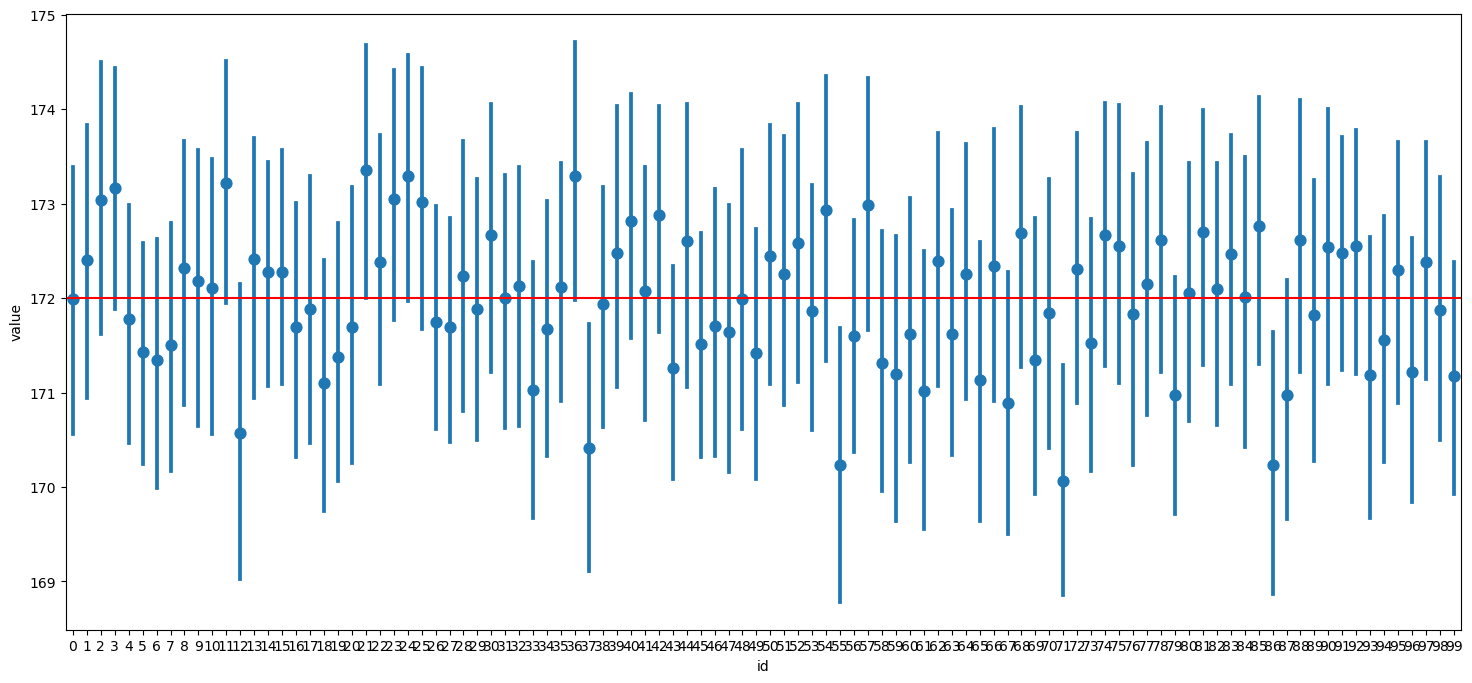

In [35]:
# errorbar 라는 차트 입니다.
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop), color = 'r')
plt.show()

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

## 4.중심극한 정리

* 표본이 클수록 표집분포는 정규분포에 가까워 진다.


### (1) 정규분포 실험

* 임의의 모집단을 하나 만듭니다.

In [41]:
pop = [round(rd.expovariate(.3)+165,2) for i in range(10001)]

* ① 모집단으로 부터 데이터 n개 짜리 표본을 뽑아 표본평균을 계산합니다.
* ② ①번 작업을 m번 반복하여 얻은 표본평균 m개로 분포를 그려봅니다.

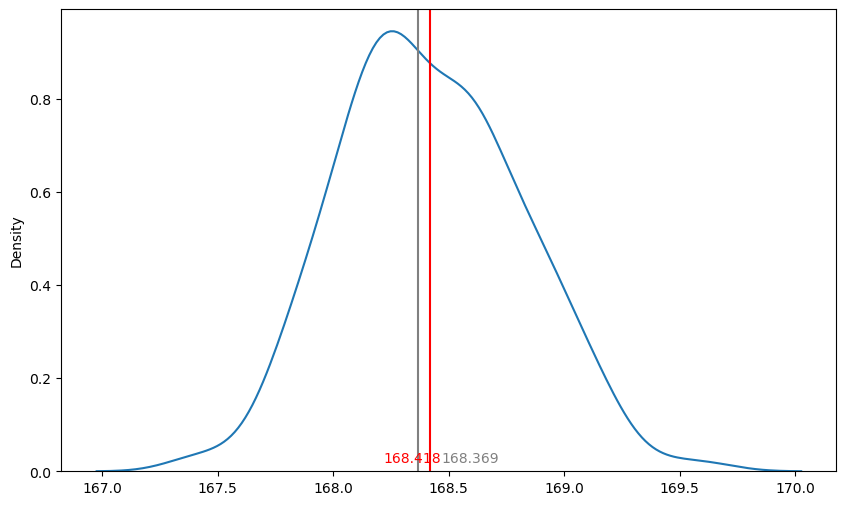

In [43]:
# 표본의 크기
n = 100

# 표본의 갯수
m = 200

sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

plt.figure(figsize=(10,6))
sns.kdeplot(sample_mean)

plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

plt.text(np.mean(sample_mean)-.2, 0.02, round(np.mean(sample_mean),3), color = 'red') #표본평균들의 평균
plt.text(np.mean(pop)+.1,0.02, round(np.mean(pop),3), color = 'grey') #모평균

plt.show() # show

* 그렇다면, 모집단은 어떤 분포일까?


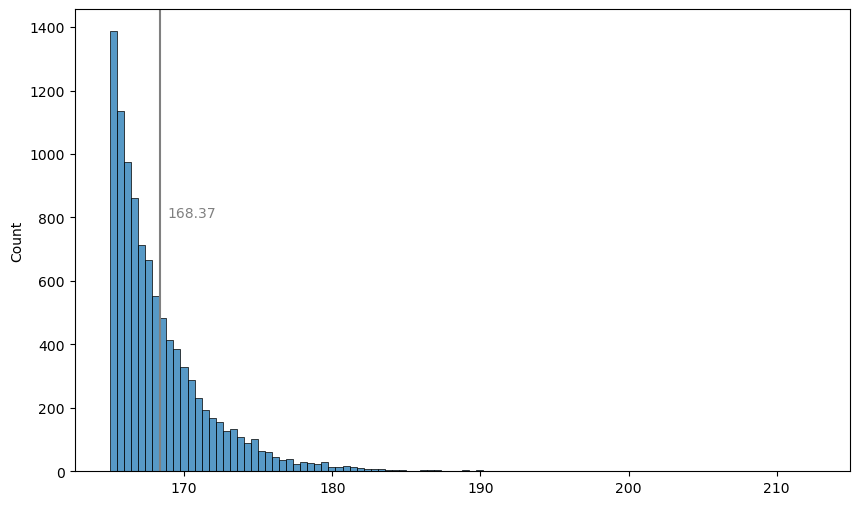

In [46]:
plt.figure(figsize=(10,6)) #설정
sns.histplot(pop, bins = 100)
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균
plt.text(np.mean(pop)+.5, 800, round(np.mean(pop),2), color = 'grey')
plt.show()

### (2) 표본의 크기에 따른 정규분포

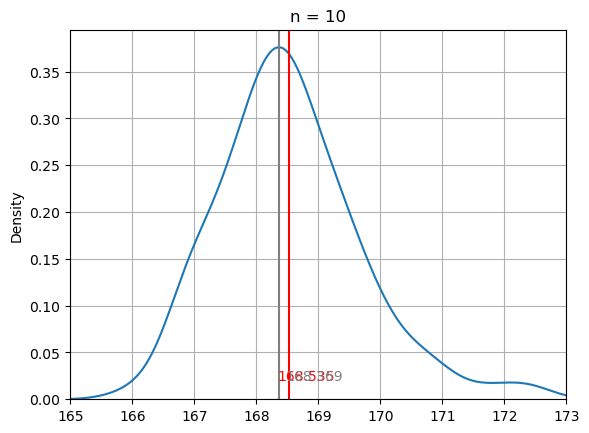

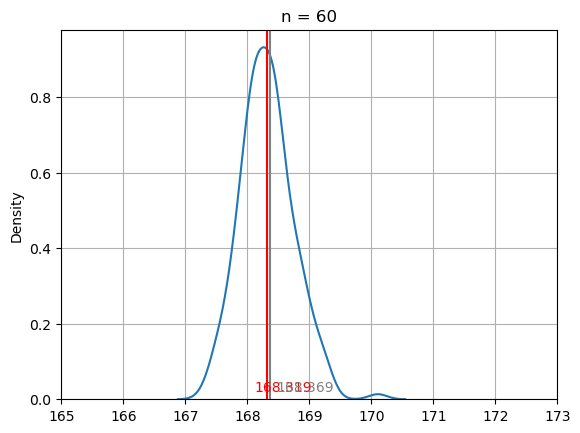

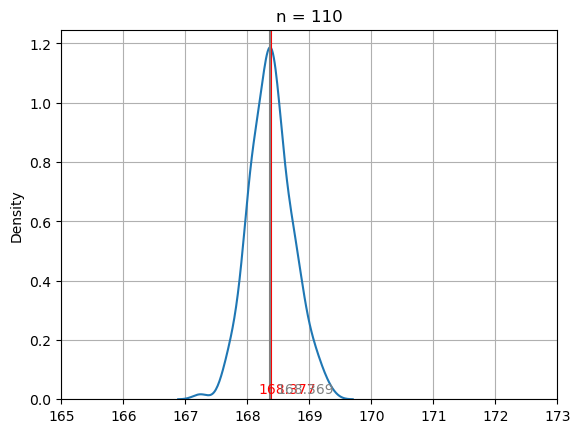

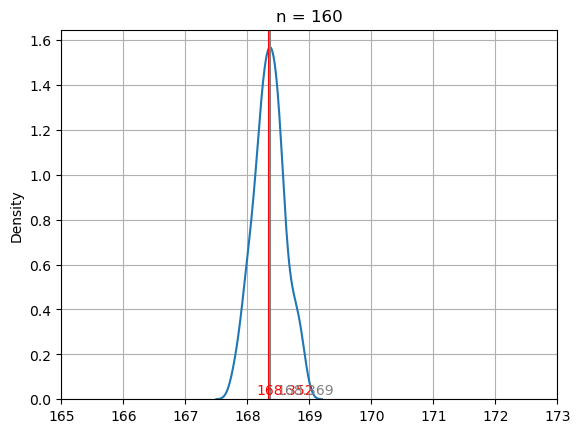

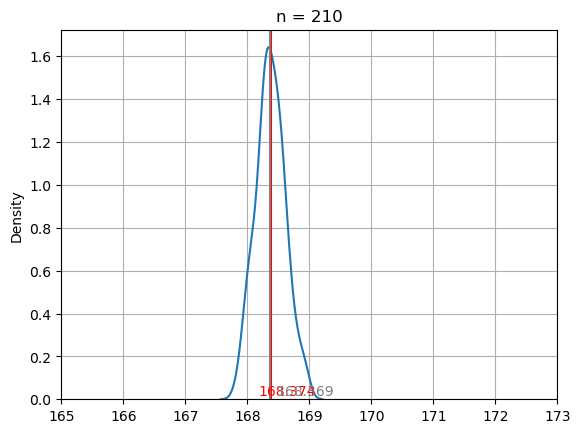

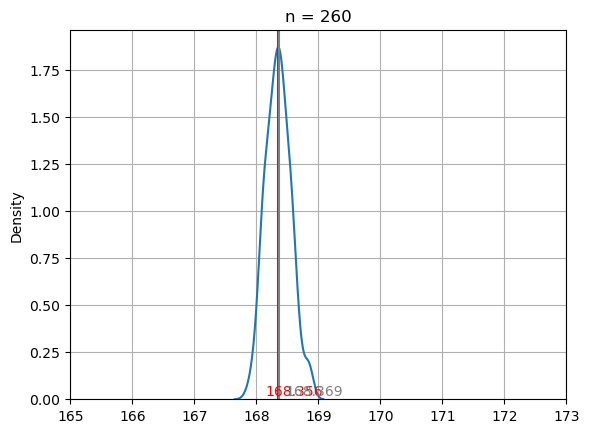

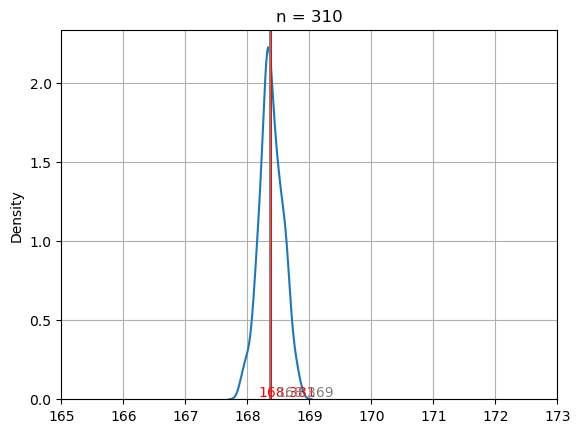

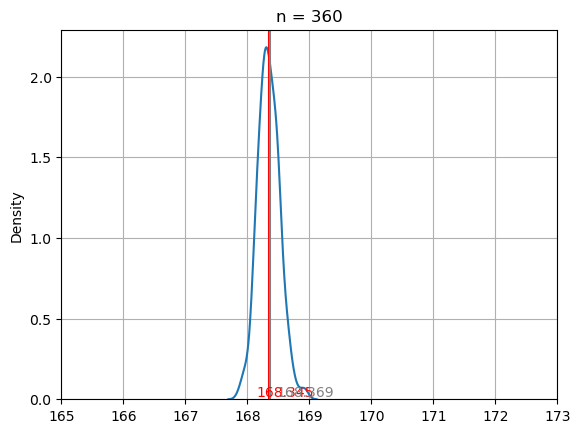

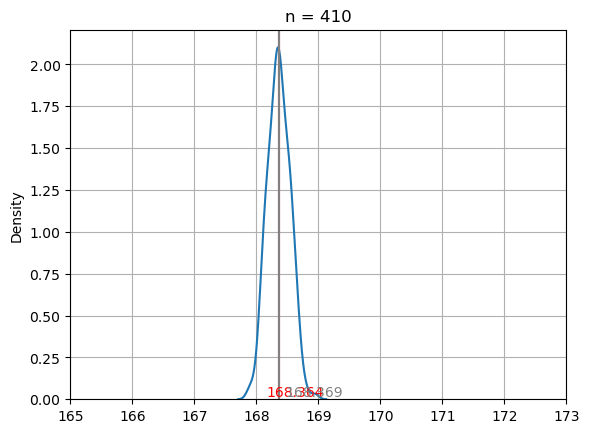

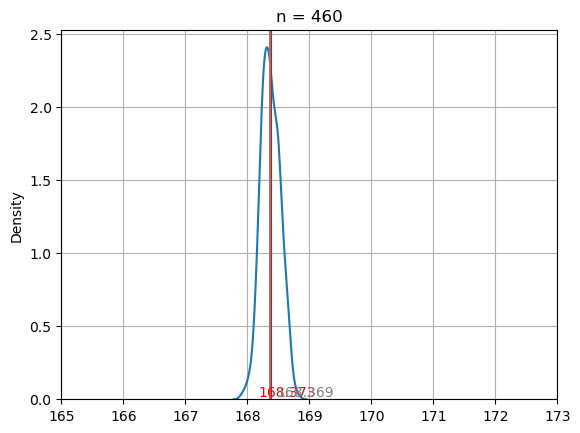

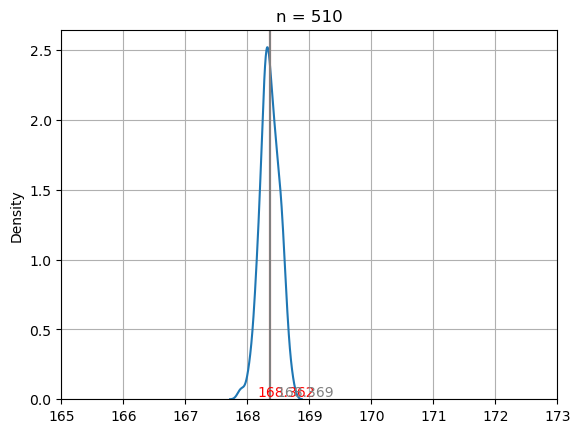

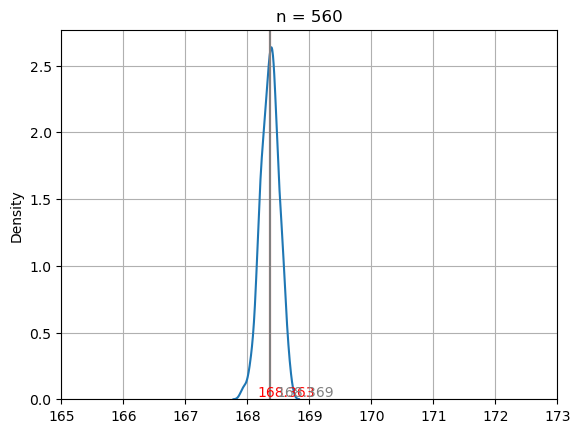

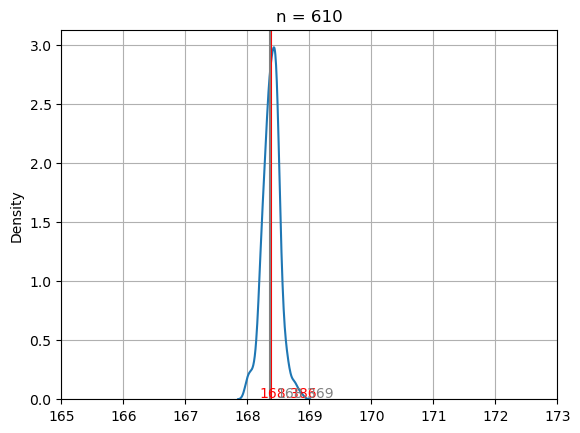

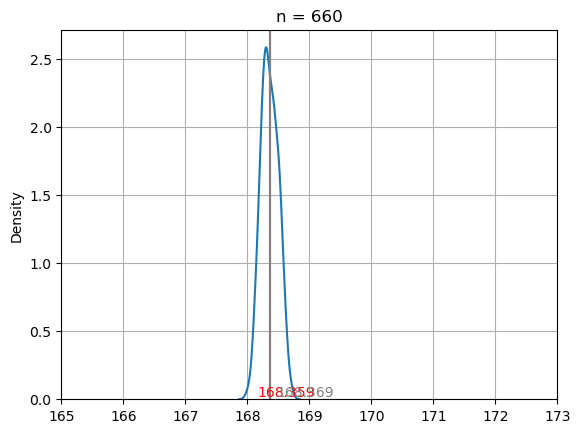

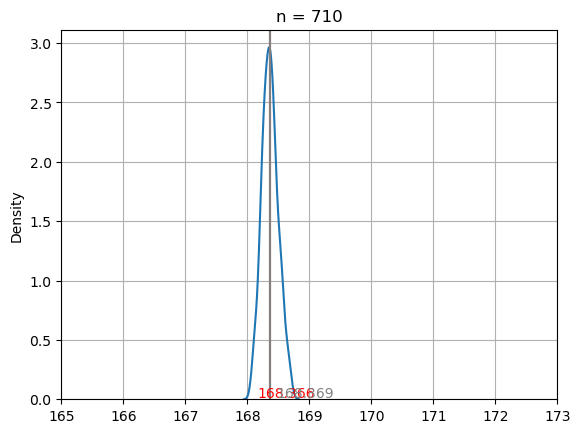

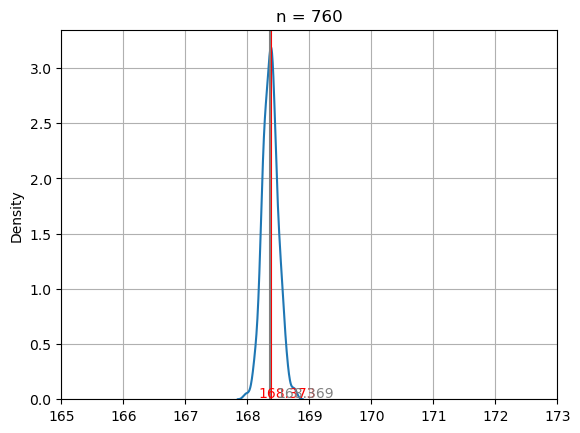

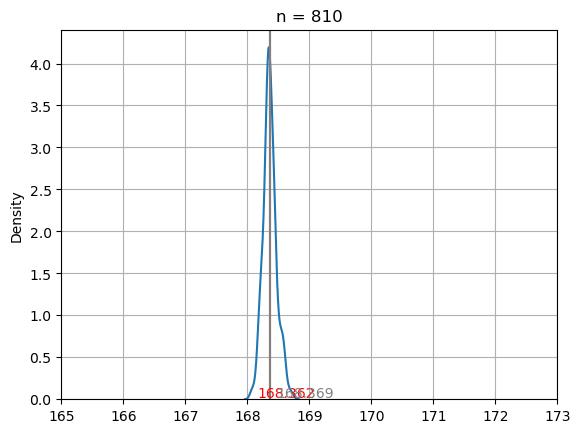

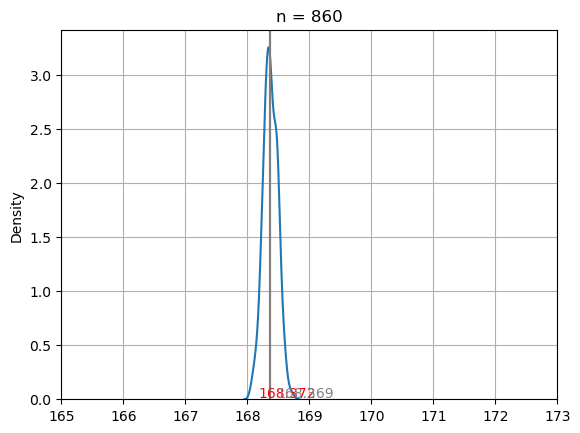

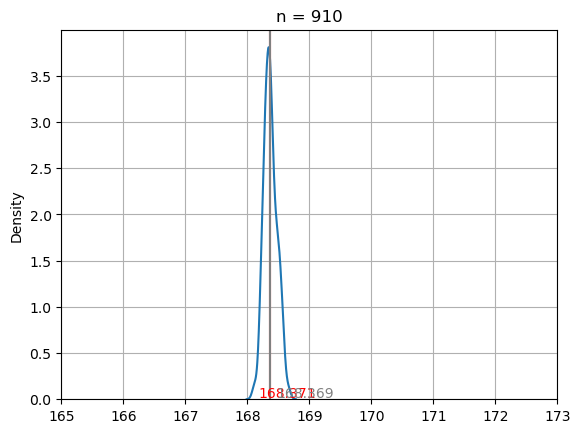

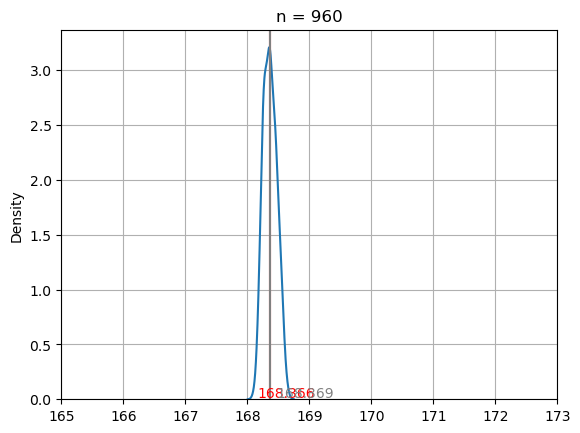

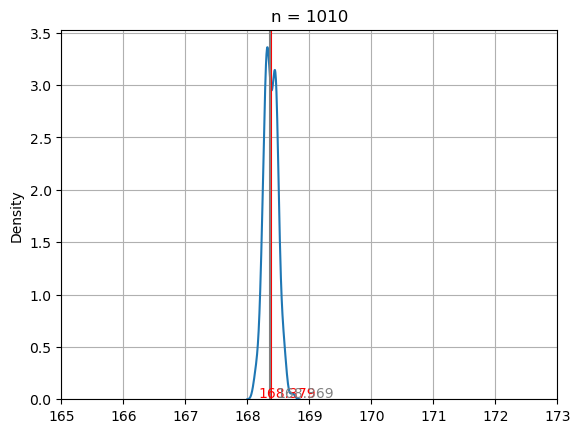

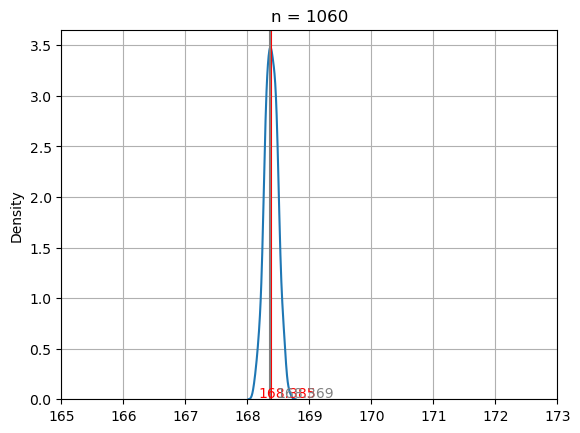

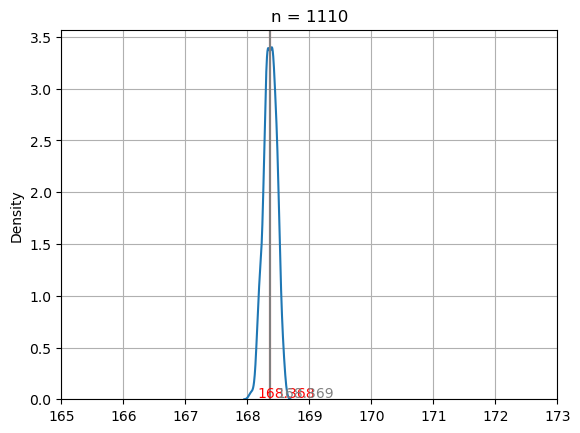

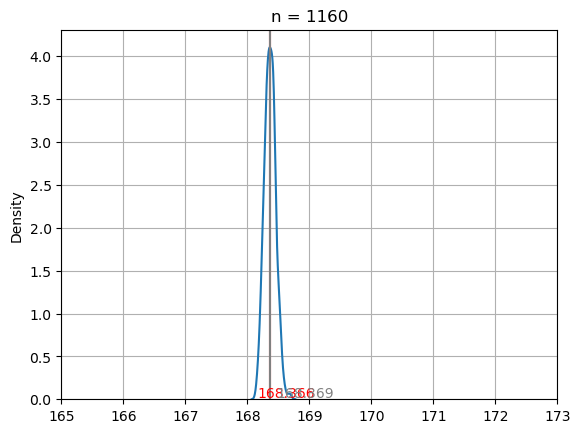

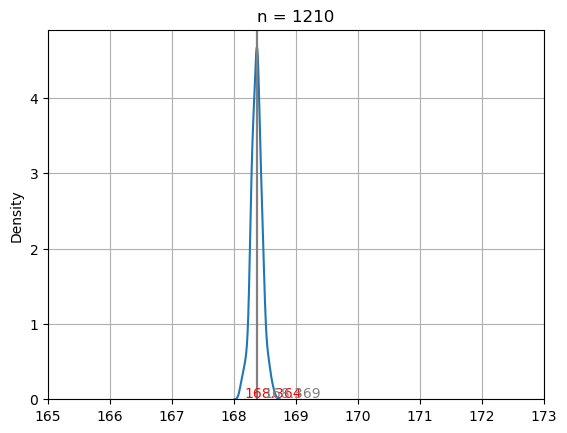

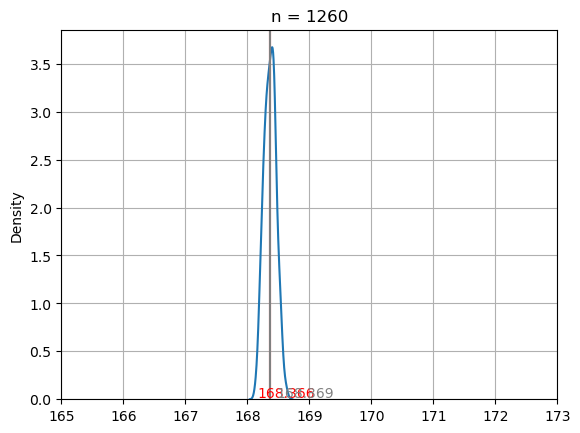

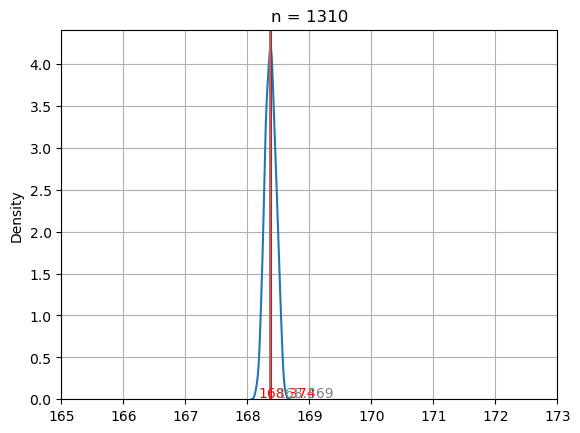

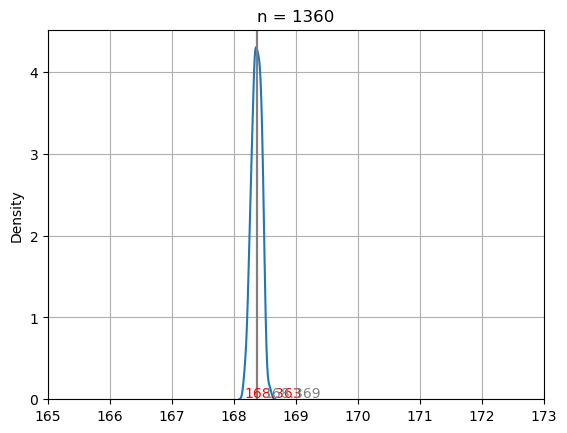

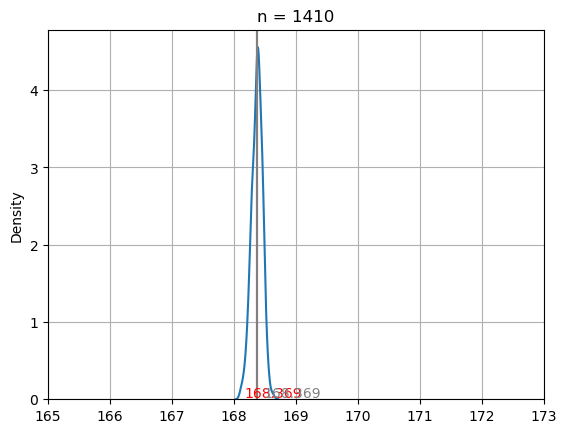

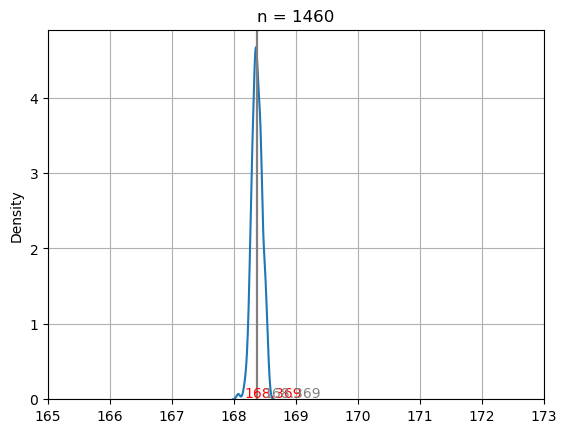

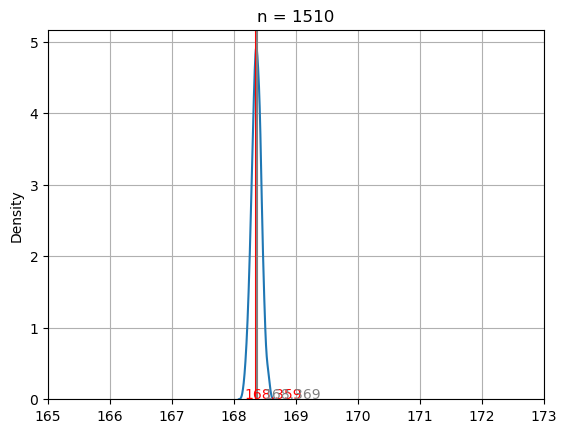

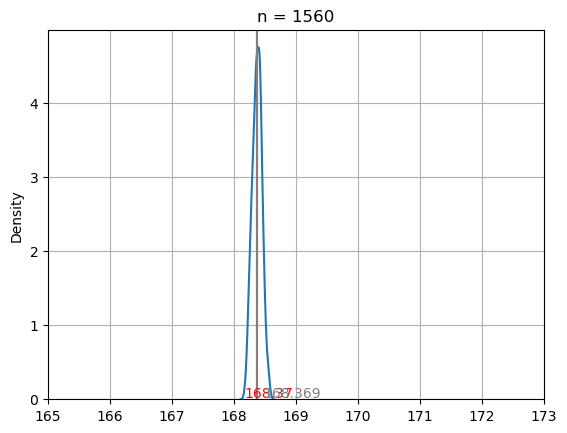

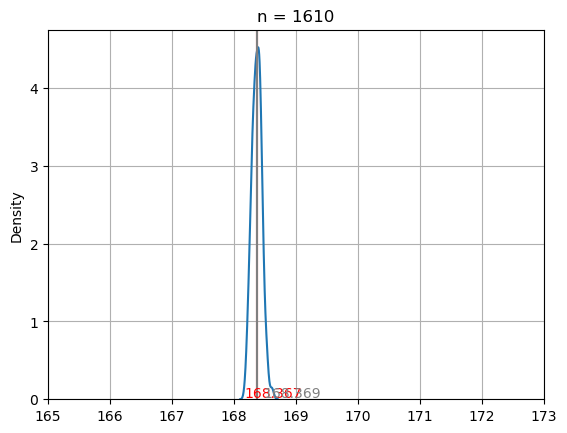

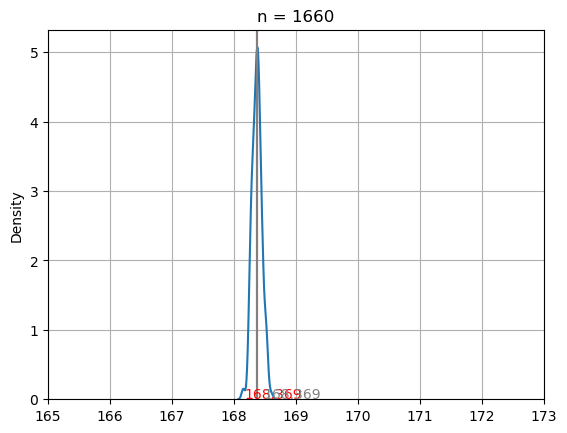

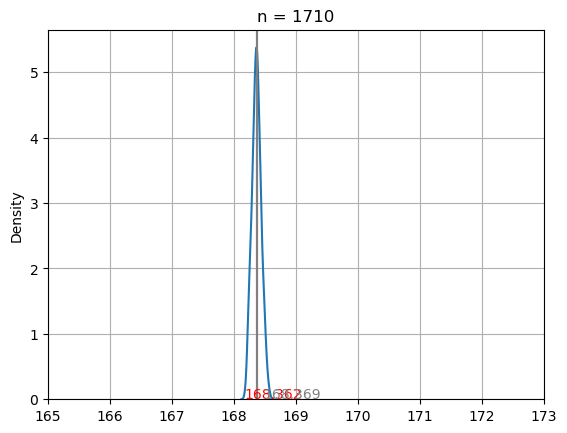

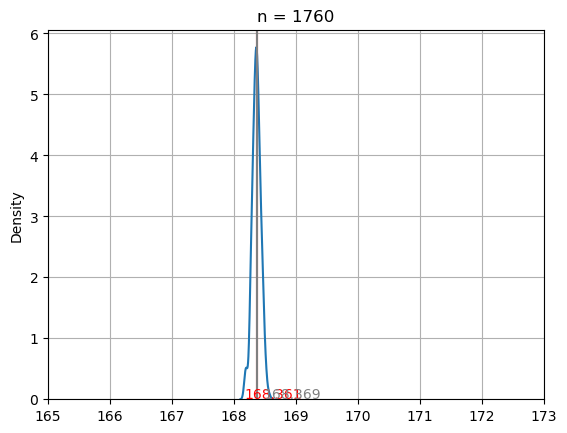

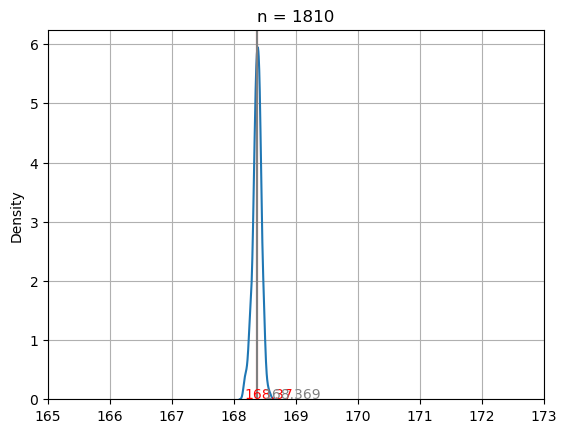

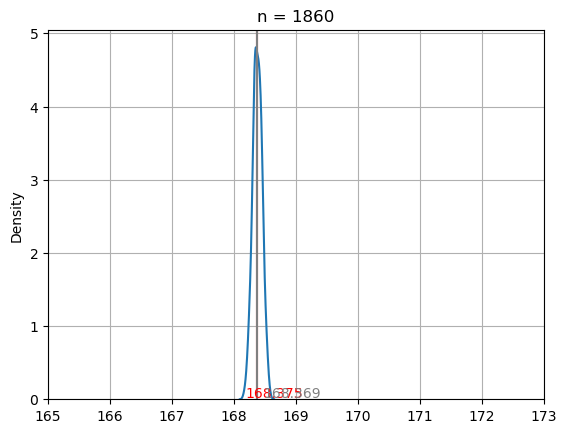

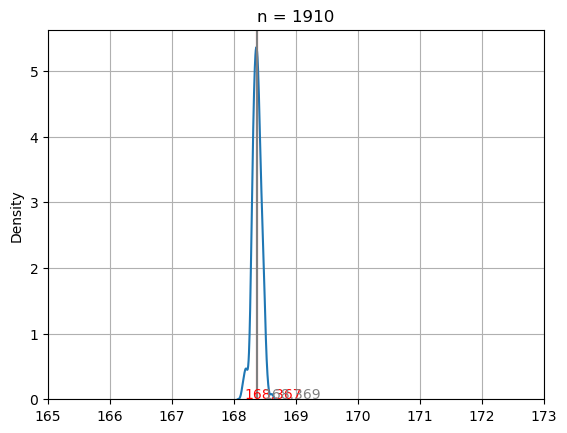

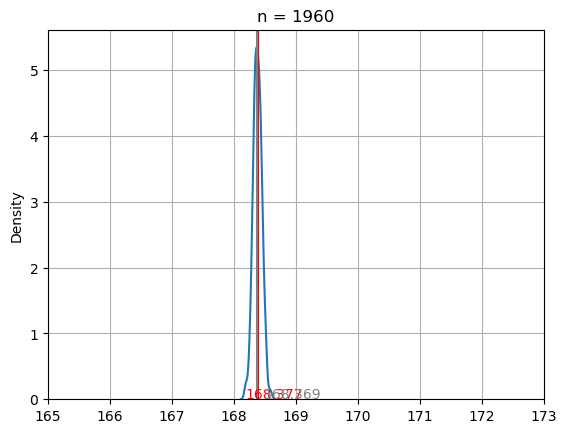

In [49]:
# 표본의 크기
n = 100

# 표본의 갯수
m = 200

for n in range(10,2001, 50 ) :
    sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

    plt.title(f'n = {n}')
    sns.kdeplot(sample_mean)
    plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
    plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

    plt.text(np.mean(sample_mean)-.2, 0.02, round(np.mean(sample_mean),3), color = 'red') #표본평균들의 평균
    plt.text(np.mean(pop)+.1,0.02, round(np.mean(pop),3), color = 'grey') #모평균
    plt.xlim(165, 173)
    plt.grid()
    plt.show() # show

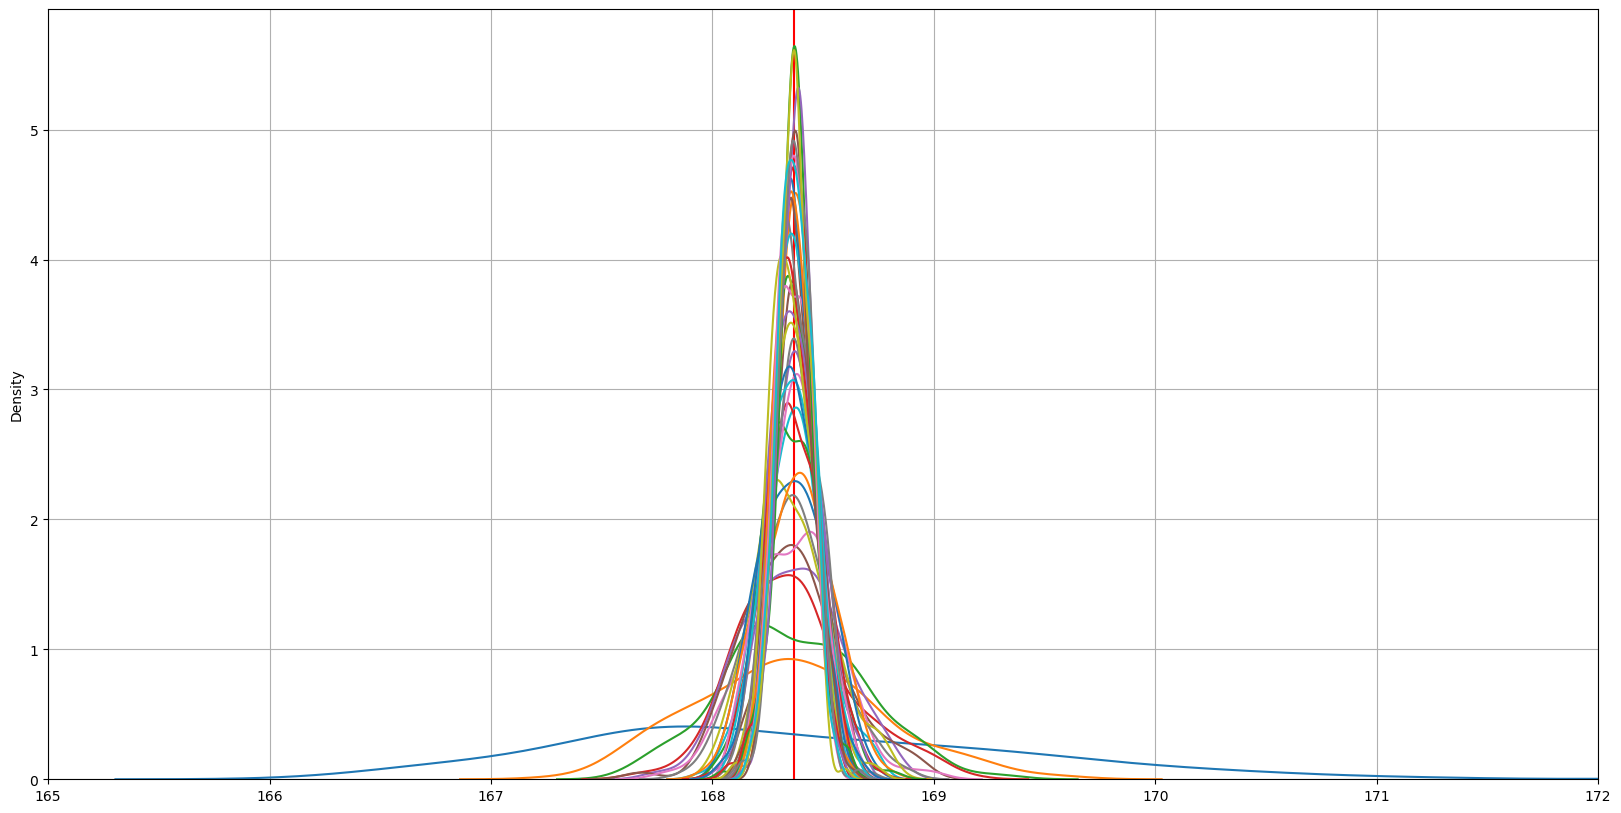

In [50]:
# 표본의 크기
n = 100

# 표본의 갯수
m = 200

plt.figure(figsize = (20,10))
plt.axvline(x=np.mean(pop), color = 'red') # 모평균
plt.xlim(165, 172)
plt.grid()

for n in range(10,2001, 50 ) :
    sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]
    sns.kdeplot(sample_mean)

plt.show()